In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import geopandas as gpd
from matplotlib.colors import LogNorm

In [7]:
# Load the dataset
df = pd.read_excel("filtered_data.xlsx")

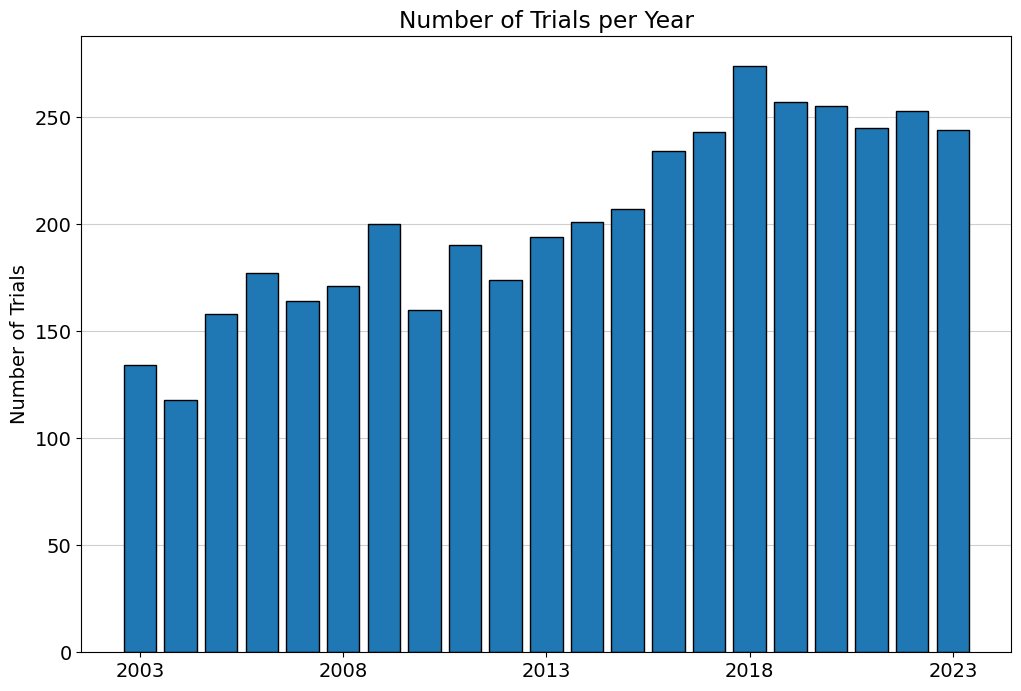

In [8]:
# Plot number of trials per year

year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.bar(year_counts.index, year_counts.values, alpha=1, width=0.8, edgecolor='black', zorder=3)
plt.ylabel('Number of Trials')
plt.title('Number of Trials per Year') 
plt.grid(alpha=0.6, zorder=0, axis='y')

ax = plt.gca()
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.xticks([2003, 2008, 2013, 2018, 2023]) 
plt.savefig('plots/Fig_2.pdf')
plt.show()

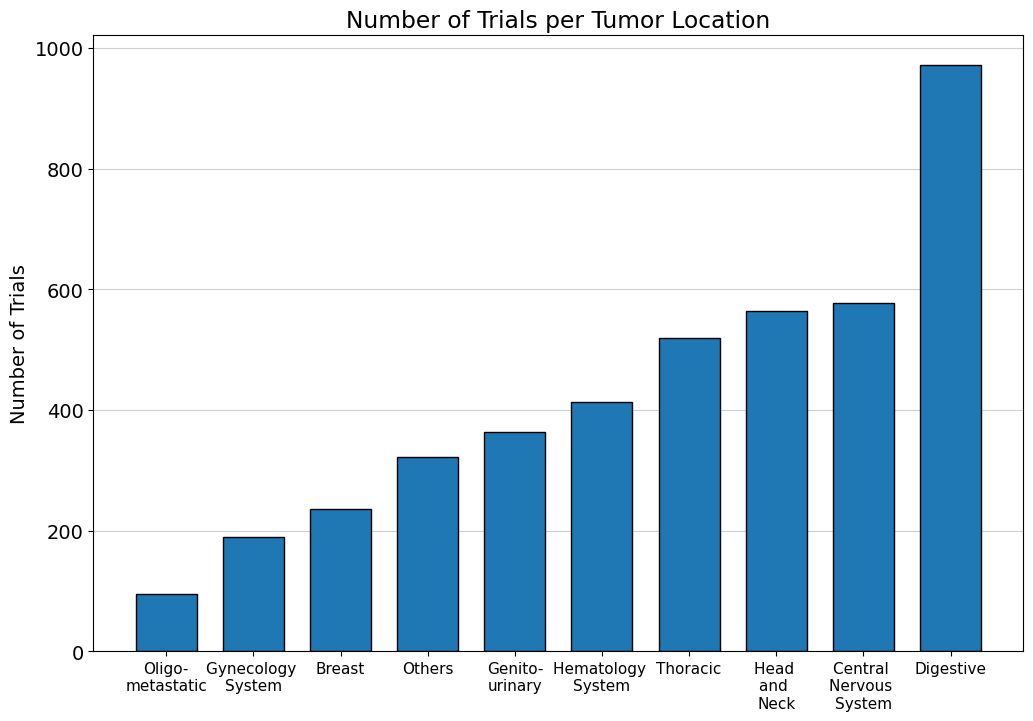

In [9]:
# Number of Trials per Tumor Location

condition_counts = df['Conditions'].value_counts().sort_values()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.bar(condition_counts.index, condition_counts.values, width=0.7, edgecolor='black', zorder= 3)
plt.ylabel('Number of Trials')

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=['Oligo-\nmetastatic', 'Gynecology \nSystem', 'Breast', 'Others', 
                                                'Genito-\nurinary', 'Hematology \nSystem', 'Thoracic', 
                                                'Head \nand \nNeck', 'Central \nNervous \nSystem', 'Digestive'], 
           rotation=0, fontdict={'fontsize': 11}) 

plt.grid(alpha=0.6, zorder=0, axis='y')

ax = plt.gca() 
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.title('Number of Trials per Tumor Location')
plt.savefig('plots/Fig_3.pdf', bbox_inches='tight')
plt.show()

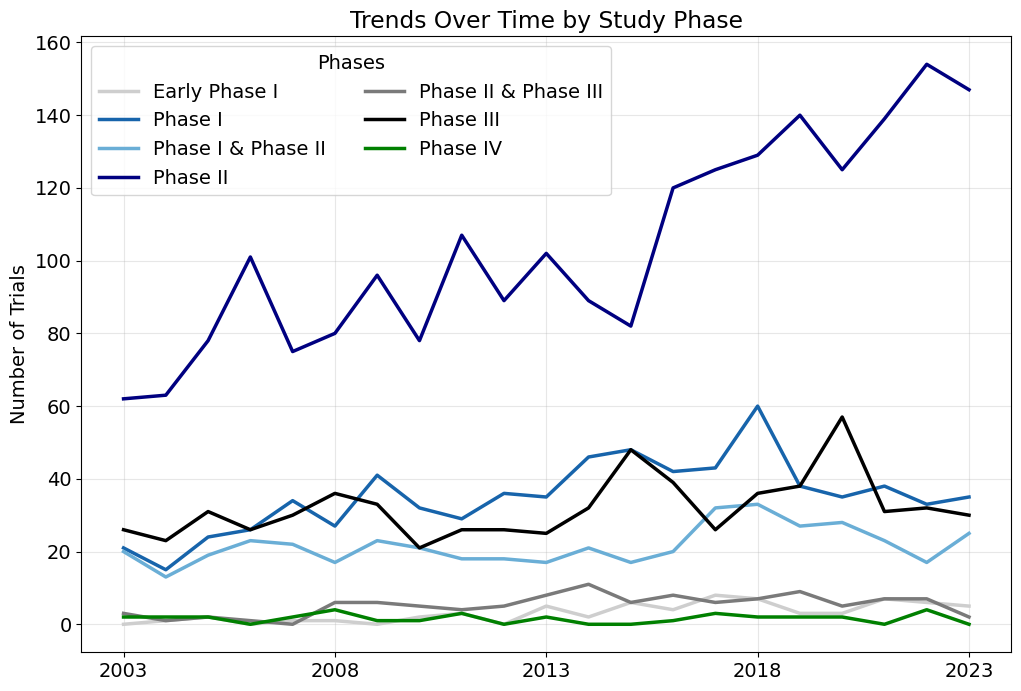

In [10]:
# Trends Over Time by Study Phase

grouped_data = df.groupby(['Year', 'Phases']).size().unstack(fill_value=0)
colors={'Early Phase I': '#cecece',
        'Phase I': '#1764ab',
        'Phase I & Phase II': '#6aaed6',
        'Phase II': 'navy',
        'Phase II & Phase III': '#7a7a7a',
        'Phase III': 'black',
        'Phase IV': 'g'}

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

for phase in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[phase], label=phase, color=colors[phase],  linewidth=2.5)

plt.title('Trends Over Time by Study Phase')
plt.ylabel('Number of Trials')
plt.legend(title='Phases', ncol=2)
plt.xticks([2003, 2008, 2013, 2018, 2023])
plt.grid(alpha=.3)
plt.savefig('plots/Fig_4.pdf')
plt.show()

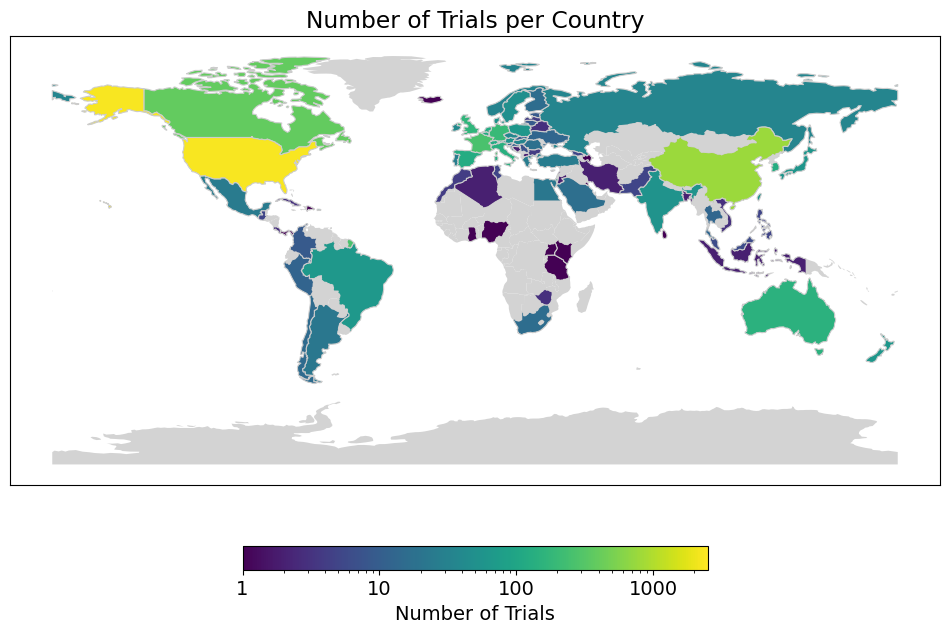

In [19]:
# Geoplot
def map(data):
    world = gpd.read_file("map/ne_110m_admin_0_countries.shp")
    
    countries = []
    for index, _ in data.iterrows():
        countries = countries + [country.strip() for country in data['Locations_Country'][index].split(',')]
    for index in range(len(countries)):
        if countries[index] == 'Korea': 
            countries[index] = 'South Korea'
        if countries[index] == 'United States':
            countries[index] = 'United States of America'
        if countries[index] == 'Russian Federation':
            countries[index] = 'Russia'
        if countries[index] == 'Macedonia':    
            countries[index] = 'North Macedonia'
        if countries[index] == 'Czech Republic':
            countries[index] = 'Czechia'
        if countries[index] == 'Tanzania':
            countries[index] = 'United Republic of Tanzania'
        if countries[index] == 'Serbia':
            countries[index] = 'Republic of Serbia'

    word_list = world['ADMIN'].tolist()
    no_trials = []
    for country in word_list:
        if country not in countries:
            no_trials.append(country)

    country_counts = {}
    for country in countries:
        country_counts[country] = country_counts.get(country, 0) + 1

    for country in no_trials:
        country_counts[country] = 0

    world['data_points_count'] = world['ADMIN'].map(country_counts)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.rcParams.update({'font.size': 14})
    norm = LogNorm(vmin=1, vmax=2500)
    
    world[world.data_points_count > 0].plot(column='data_points_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm)
    world[world.data_points_count == 0].plot(color='lightgray', ax=ax)

    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)

    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1)
    cbar.set_label('Number of Trials')
    
    tick_values = [1, 10, 100, 1000]
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels(['1', '10', '100', '1000'])

    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title('Number of Trials per Country')
    plt.savefig('plots/Fig_5a.pdf')
    plt.show()
    
map(df)

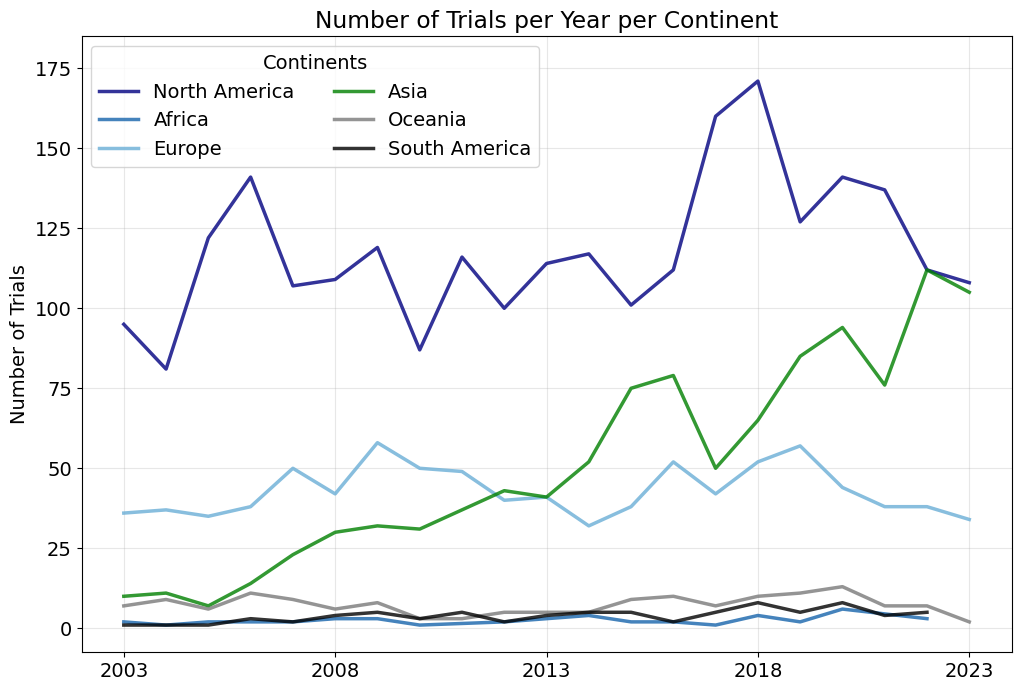

In [13]:
# Number of Trials per Year per Continent
africa_rows = df[df['Locations_Continent'].str.contains('Africa', na=False)]
asia_rows = df[df['Locations_Continent'].str.contains('Asia', na=False)]
europe_rows = df[df['Locations_Continent'].str.contains('Europe', na=False)]
oceania_rows = df[df['Locations_Continent'].str.contains('Oceania', na=False)]
south_america_rows = df[df['Locations_Continent'].str.contains('South_America', na=False)]
north_america_rows = df[df['Locations_Continent'].str.contains('North_America', na=False)]

year_counts_africa = africa_rows['Year'].value_counts().sort_index()
year_counts_north_america = north_america_rows['Year'].value_counts().sort_index()
year_counts_europe = europe_rows['Year'].value_counts().sort_index()
year_counts_asia = asia_rows['Year'].value_counts().sort_index()
year_counts_oceania = oceania_rows['Year'].value_counts().sort_index()
year_counts_south_america = south_america_rows['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.plot(year_counts_north_america.index, year_counts_north_america.values, label = 'North America', alpha = .8, color='navy', linewidth=2.5)
plt.plot(year_counts_africa.index, year_counts_africa.values, label = 'Africa', alpha = .8, color='#1764ab', linewidth=2.5)
plt.plot(year_counts_europe.index, year_counts_europe.values, label = 'Europe', alpha = .8, color='#6aaed6', linewidth=2.5)
plt.plot(year_counts_asia.index, year_counts_asia.values, label = 'Asia', alpha = .8, linewidth=2.5, color= 'g')
plt.plot(year_counts_oceania.index, year_counts_oceania.values, label = 'Oceania', alpha = .8, color='#7a7a7a', linewidth=2.5)
plt.plot(year_counts_south_america.index, year_counts_south_america.values, label = 'South America', alpha = .8, color='black', linewidth=2.5)

plt.ylabel('Number of Trials', fontsize=14)
plt.title('Number of Trials per Year per Continent')
plt.xticks([2003, 2008, 2013, 2018, 2023])
plt.yticks([year for year in range(0, 199, 25)])
plt.ylim(top=185)
plt.legend(title='Continents', ncol=2)
plt.grid(alpha=.3)
plt.savefig('plots/Fig_5b.pdf')
plt.show()

In [14]:
# Statistics I 
records = []
category_p_val = []

df_2003_2012 = df[df['Year'] < 2013]
df_2013_2023 = df[df['Year'] >= 2013]

for continent in ['Africa', 'Asia', 'Europe', 'Oceania', 'South_America', 'North_America']:
    
    continent_2003_2012 = df_2003_2012[df_2003_2012['Locations_Continent'].str.contains(continent, na=False)].shape[0]
    continent_2013_2023 = df_2013_2023[df_2013_2023['Locations_Continent'].str.contains(continent, na=False)].shape[0]

    tot_trials_2003_2012 = df_2003_2012.shape[0]
    tot_trials_2013_2023 = df_2013_2023.shape[0]

    contingency_table = np.array([
        [continent_2003_2012, tot_trials_2003_2012 - continent_2003_2012],
        [continent_2013_2023, tot_trials_2013_2023 - continent_2013_2023]
    ])
    if np.any(contingency_table < 5):
        odds_ratio, p = stats.fisher_exact(contingency_table)
        test = 'Fisher'
    else:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        test = 'Chi2'
 
    if p < 0.01:
        p ='< 0.01'
    else:
        p = f'{round(p,2)}'
        
    records.append({
        'Countinent': continent,
        '2003-2012': f'{continent_2003_2012} ({round((continent_2003_2012/tot_trials_2003_2012)*100,2)}%)',
        '2013-2023': f'{continent_2013_2023} ({round((continent_2013_2023/tot_trials_2013_2023)*100,2)}%)',
        'P-Value': p,
        'Test': test 
    })
    category_p_val.append([continent_2003_2012, continent_2013_2023])

p_values_df = pd.DataFrame(records)

p_values_df['P-Value'] = p_values_df['P-Value']

chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
if p_value < 0.01:
        p_value ='< 0.01'
else:
    p_value = f'{round(p_value,2)}'
print(f"Continents: P-value: {p_value}")

p_values_df

Continents: P-value: < 0.01


,Countinent,2003-2012,2013-2023,P-Value,Test
0,Africa,16 (0.97%),24 (0.92%),1.0,Chi2
1,Asia,238 (14.46%),834 (31.99%),< 0.01,Chi2
2,Europe,435 (26.43%),468 (17.95%),< 0.01,Chi2
3,Oceania,67 (4.07%),86 (3.3%),0.22,Chi2
4,South_America,27 (1.64%),51 (1.96%),0.53,Chi2
5,North_America,1077 (65.43%),1400 (53.7%),< 0.01,Chi2


In [15]:
# Statistics II 

records = []

for col in df.columns:
    if col not in ['Study Title', 'Locations_Country', 'Year', 'Locations_Continent']:
        category_p_val = []
        conditions = df[col].unique()

        trials_2003_2012 = {}
        trials_2013_2023 = {}
        tot_trials_2003_2012 = df_2003_2012.shape[0]
        tot_trials_2013_2023 = df_2013_2023.shape[0]

        for condition in conditions:
            trials_2003_2012[condition] = df_2003_2012[df_2003_2012[col] == condition].shape[0]
            trials_2013_2023[condition] = df_2013_2023[df_2013_2023[col] == condition].shape[0]
            contingency_table = np.array([
                [trials_2003_2012[condition], tot_trials_2003_2012 - trials_2003_2012[condition]],
                [trials_2013_2023[condition], tot_trials_2013_2023 - trials_2013_2023[condition]]
            ])
            if np.any(contingency_table < 5):
                odds_ratio, p = stats.fisher_exact(contingency_table)
                test = 'Fisher'
            else:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                test = 'Chi2'
            if p < 0.01:
                p ='< 0.01'
            else:
                p = f'{round(p,2)}'
                
            records.append({
                'Parameter': col,
                'Condition': condition,
                '2003-2012': f'{trials_2003_2012[condition]} ({round((trials_2003_2012[condition]/tot_trials_2003_2012)*100,2)}%)',
                '2013-2023': f'{trials_2013_2023[condition]} ({round((trials_2013_2023[condition]/tot_trials_2013_2023)*100,2)}%)',
                'P-Value': p,
                'Test': test 
            })
            category_p_val.append([trials_2003_2012[condition], trials_2013_2023[condition]])
        chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
        if p_value < 0.01:
                p_value ='< 0.01'
        else:
            p_value = f'{round(p_value,2)}'
        print(f"{col} Group: P-value: {p_value}")
            
p_values_df = pd.DataFrame(records)

p_values_df['P-Value'] = p_values_df['P-Value']

p_values_df

Study Status Group: P-value: < 0.01
Conditions Group: P-value: < 0.01
Sex Group: P-value: 0.02
Age Group: P-value: < 0.01
Phases Group: P-value: < 0.01
Funder Type Group: P-value: 0.07


,Parameter,Condition,2003-2012,2013-2023,P-Value,Test
0,Study Status,Ongoing,129 (7.84%),1536 (58.92%),< 0.01,Chi2
1,Study Status,Unknown,229 (13.91%),366 (14.04%),0.94,Chi2
2,Study Status,Completed,926 (56.26%),430 (16.49%),< 0.01,Chi2
3,Study Status,Stopped Early,362 (21.99%),275 (10.55%),< 0.01,Chi2
4,Conditions,Digestive,351 (21.32%),621 (23.82%),0.06,Chi2
5,Conditions,Others,106 (6.44%),216 (8.29%),0.03,Chi2
6,Conditions,Central Nervous System,250 (15.19%),327 (12.54%),0.02,Chi2
7,Conditions,Thoracic,207 (12.58%),313 (12.01%),0.61,Chi2
8,Conditions,Genitourinary,131 (7.96%),233 (8.94%),0.29,Chi2
9,Conditions,Breast,96 (5.83%),140 (5.37%),0.57,Chi2


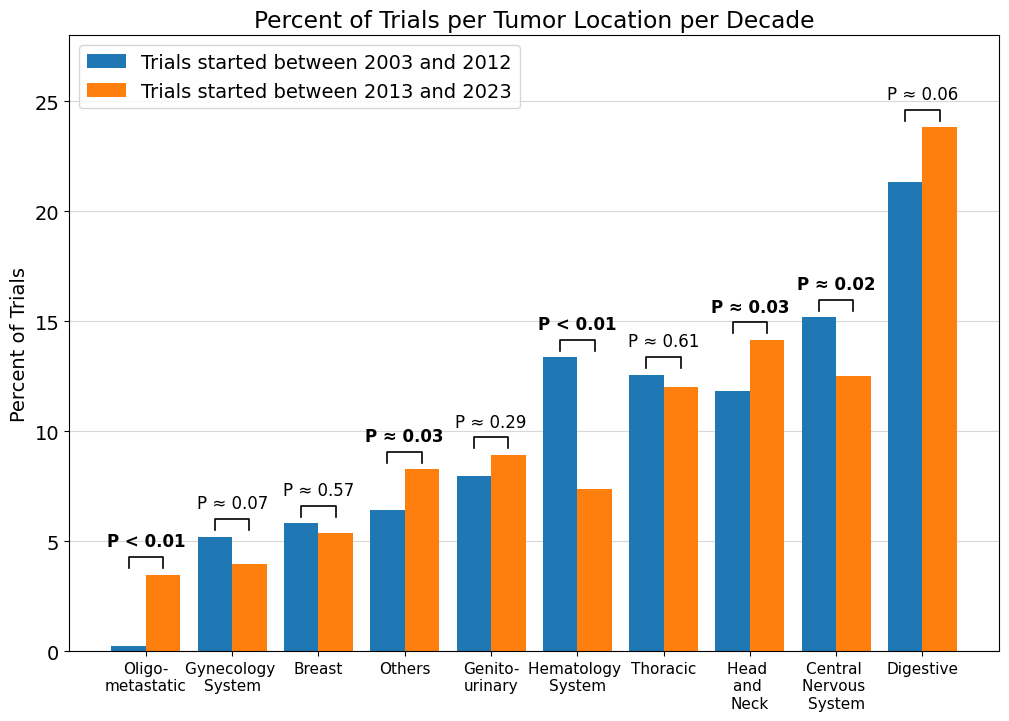

In [23]:
# Percent of Trials per Tumor Location per Decade

condition_counts_2003_2012 = df_2003_2012['Conditions'].value_counts().sort_index()
condition_counts_2013_2023 = df_2013_2023['Conditions'].value_counts().sort_index()

combined_counts = (condition_counts_2003_2012 + condition_counts_2013_2023).sort_values(ascending=True)

conditions = combined_counts.index
bar_width = 0.4
x = np.arange(len(conditions))

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

p_list = ['P < 0.01', 'P \u2248 0.07', 'P \u2248 0.57', 'P \u2248 0.03', 'P \u2248 0.29', 'P < 0.01', 'P \u2248 0.61', 'P \u2248 0.03', 'P \u2248 0.02', 'P \u2248 0.06']

plt.bar(x - bar_width/2, [condition_counts_2003_2012.get(condition, 0)*(100/1646) for condition in conditions], width=bar_width, label='Trials started between 2003 and 2012', alpha=1, zorder=3)
plt.bar(x + bar_width/2, [condition_counts_2013_2023.get(condition, 0)*(100/2607) for condition in conditions], width=bar_width, label='Trials started between 2013 and 2023', alpha=1, zorder=3)
for i in x:
    max_y = max(condition_counts_2013_2023.get(conditions[i])*(100/2607),  condition_counts_2003_2012.get(conditions[i])*(100/1646)) + 0.8
    plt.plot([x[i]-.2, x[i]-.2, x[i]+.2, x[i]+.2], [max_y-0.5, max_y, max_y, max_y-0.5], lw=1.2, c='k')
    if float(p_list[i].split(' ')[-1]) <= 0.05: 
        plt.text(x[i], max_y+0.3, p_list[i], ha='center', va='bottom', color='k', fontweight='bold', fontsize=12)
    else:
        plt.text(x[i], max_y+0.3, p_list[i], ha='center', va='bottom', color='k', fontsize=12)

plt.ylabel('Percent of Trials', fontsize=14)

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=['Oligo-\nmetastatic', 'Gynecology \nSystem', 'Breast', 'Others', 
                                                'Genito-\nurinary', 'Hematology \nSystem', 'Thoracic', 
                                                'Head \nand \nNeck', 'Central \nNervous \nSystem', 'Digestive'], 
           rotation=0, fontdict={'fontsize': 11})

plt.title('Percent of Trials per Tumor Location per Decade')
plt.ylim(top=28)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.5, zorder=1)

ax = plt.gca()
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.savefig('plots/fig_appendix_1.pdf', bbox_inches='tight')
plt.show()


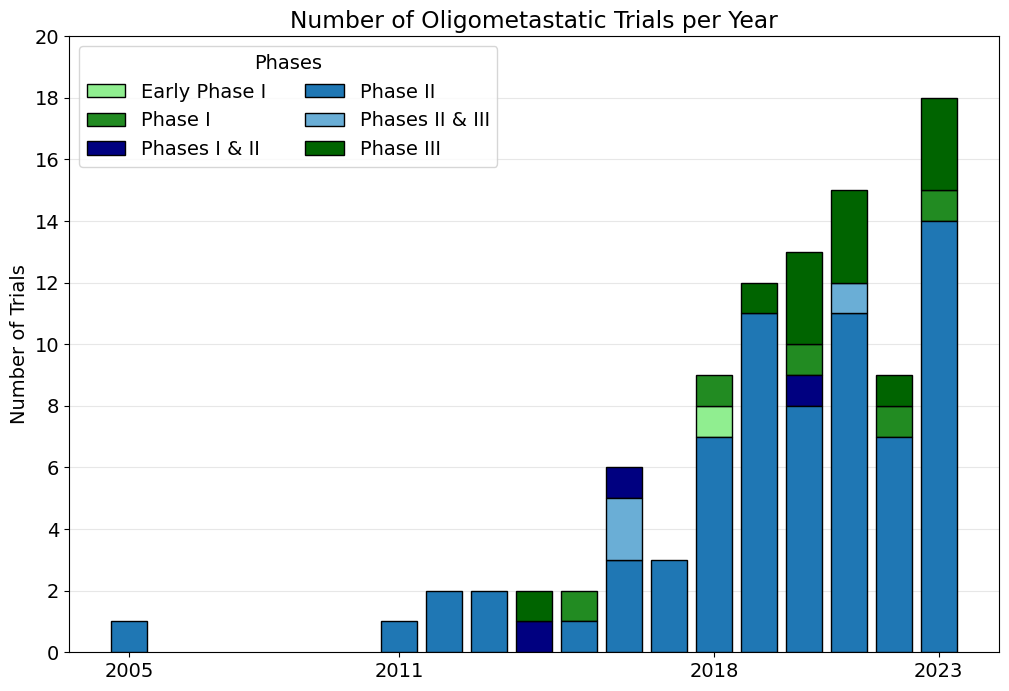

In [18]:
# Number of Oligometastatic Trials per Year

omd_df = df[df['Conditions'] == 'Oligometastatic']

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

for year in range(2003, 2024):
    if len(omd_df[omd_df['Year']==year]['Phases'].unique()) != 0:
        early_ph_I = 0
        ph_I = 0
        ph_I_II = 0
        ph_II = 0
        ph_II_III = 0
        ph_III = 0
        ph_IV = 0
        for phase in omd_df[omd_df['Year']==year]['Phases']:
            if phase == 'Early Phase I':
                early_ph_I += 1
            elif phase == 'Phase I':
                ph_I += 1
            elif phase == 'Phase I & Phase II':
                ph_I_II += 1
            elif phase == 'Phase II':
                ph_II += 1
            elif phase == 'Phase II & Phase III':
                ph_II_III += 1
            elif phase == 'Phase III':
                ph_III += 1
            elif phase == 'Phase IV':
                ph_IV += 1
        if early_ph_I !=0:
            plt.bar(year, early_ph_I, bottom=ph_II+ph_II_III+ph_I_II, color='lightgreen', edgecolor='black', zorder=3)
        if ph_I !=0:
            plt.bar(year, ph_I, bottom=ph_II+ph_II_III+ph_I_II+early_ph_I, color='forestgreen', edgecolor='black', zorder=3)
        if ph_I_II !=0:
            plt.bar(year, ph_I_II, bottom=ph_II+ph_II_III, color='navy', edgecolor='black', zorder=3)
        if ph_II !=0:
            plt.bar(year, ph_II, color='#1f77b4', edgecolor='black', zorder=3)
        if ph_II_III != 0:
            plt.bar(year, ph_II_III, bottom=ph_II, color='#6aaed6', edgecolor='black', zorder=3)
        if ph_III != 0:
            plt.bar(year, ph_III,bottom=ph_II+ph_II_III+ph_I_II+early_ph_I+ph_I, color='darkgreen', edgecolor='black', zorder=3)
        
plt.bar(2005, 0, color='lightgreen', zorder=1, edgecolor='black',  label='Early Phase I')
plt.bar(2005, 0, color='forestgreen', zorder=1, edgecolor='black', label='Phase I')
plt.bar(2005, 0, color='navy', zorder=1, edgecolor='black', label='Phases I & II')
plt.bar(2005, 0, color='#1f77b4', edgecolor='black', zorder=1, label='Phase II')
plt.bar(2005, 0, color='#6aaed6', edgecolor='black', zorder=1, label='Phases II & III')
plt.bar(2005, 0, color='darkgreen', edgecolor='black', zorder=1, label='Phase III')

plt.ylabel('Number of Trials')
plt.title('Number of Oligometastatic Trials per Year')
plt.grid(alpha = .3, axis = 'y')
plt.xticks([2005, 2011, 2018, 2023])
plt.legend(title='Phases', ncol=2)
plt.yticks(range(0, 21, 2))
plt.savefig('plots/fig_appendix_2.pdf')
plt.show()
